Beaming and Boosting
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and create a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import matplotlib.pyplot as plt

b = phoebe.default_binary()

Let's make our system so that the boosting effects will be quite noticeable.

In [3]:
b['requiv@primary'] = 1.8
b['requiv@secondary'] = 0.96

b['teff@primary'] = 10000
b['gravb_bol@primary'] = 1.0
b['teff@secondary'] = 5200
b['gravb_bol@secondary'] = 0.32

b['q@binary'] = 0.96/1.8
b['incl@binary'] = 88

b['period@binary'] = 1.0
b['sma@binary'] = 6.0


We'll add [lc](./LC.ipynb), [rv](./RV.ipynb), and [mesh](./MESH.ipynb) datasets so that we can see how they're each affected by boosting.

In [4]:
times = phoebe.linspace(0,1,101)

In [5]:
b.add_dataset('lc', times=times, dataset='lc01')

<ParameterSet: 20 parameters | contexts: dataset, compute, constraint>

In [6]:
b.add_dataset('rv', times=times, dataset='rv01')

<ParameterSet: 18 parameters | contexts: dataset, compute, constraint>

In [7]:
b.add_dataset('mesh', times=[0.6], dataset='mesh01', columns=['boost_factors@lc01'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

Relevant Parameters
---------------------------------

In [8]:
print(b['boosting_method@compute'])

Parameter: boosting_method@phoebe01@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



In [9]:
print(b['boosting_method@compute'].choices)

['none', 'linear']


Influence on Luminosities (pblum, pblum_ext, pbflux, pbflux_ext)
------------------------

Boosting is considered an 'extrinsic' effect (along with [spots](./spots.ipynb) and [irradiation](./reflection_heating.ipynb)), but because its aspect-dependent, does not affect luminsoties (`pblum` and `pblum_ext`) at all.

Although it will affect fluxes in light curves (see section below), `pbflux` and `pbflux_ext` as estimated by [b.compute_pblums](../api/phoebe.frontend.bundle.Bundle.compute_pblums.md) estimates these under the spherical assumption from the luminosities, and so will *ignore* the contribution of boosting.

Note that this also means that if you set `pblum_mode = 'total flux'`, boosting will be ignored in the scaling.  See the [pblum tutorial](./pblum.ipynb) for more details.

In [10]:
b.set_value('irrad_method', 'none')

In [11]:
print(b.compute_pblums(dataset='lc01', boosting_method='linear', pbflux=True, pbflux_ext=True))

{'pbflux@lc01': <Quantity 1.02244359 W / m2>, 'pblum@primary@lc01': <Quantity 12.56637061 W>, 'pbflux_ext@lc01': <Quantity 1.02244359 W / m2>, 'pblum@secondary@lc01': <Quantity 0.28203444 W>, 'pblum_ext@primary@lc01': <Quantity 12.56637061 W>, 'pblum_ext@secondary@lc01': <Quantity 0.28203444 W>}


Influence on Light Curves (fluxes)
----------------------------

In [12]:
b.run_compute(boosting_method='none', model='boosting_none')

<ParameterSet: 14 parameters | kinds: rv, mesh, lc>

In [13]:
b.run_compute(boosting_method='linear', model='boosting_linear')

<ParameterSet: 14 parameters | kinds: rv, mesh, lc>

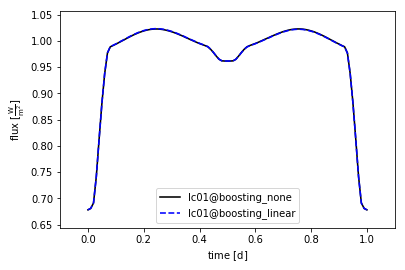

In [14]:
afig, mplfig = b['lc01'].plot(show=True, legend=True)

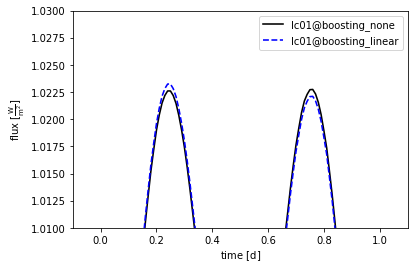

In [15]:
afig, mplfig = b['lc01'].plot(ylim=(1.01,1.03), show=True, legend=True)

Influence on Radial Velocities
---------------------

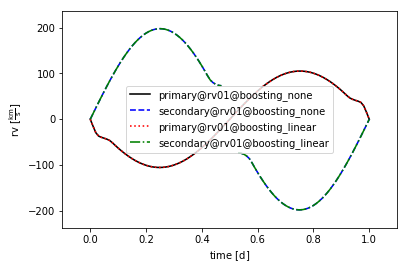

In [16]:
afig, mplfig = b['rv01@model'].plot(show=True, legend=True)

Influence on Meshes
-------------------------

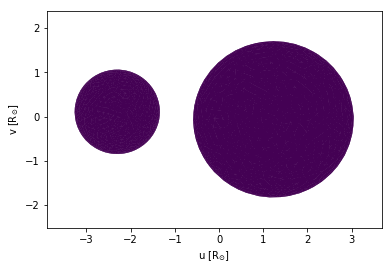

In [17]:
afig, mplfig = b['mesh@boosting_none'].plot(time=0.6, fc='boost_factors', ec='none', show=True)

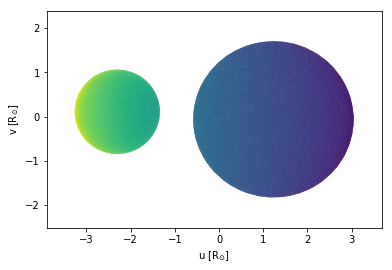

In [18]:
afig, mplfig = b['mesh@boosting_linear'].plot(time=0.6, fc='boost_factors', ec='none', show=True)